In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2

font = cv2.FONT_HERSHEY_COMPLEX

Threshold = 0.5
image_size = 320


def final_prediction(prediction_box , bounding_box , confidence , class_labels,width_ratio,height_ratio):
    for j in prediction_box.flatten():
        x, y , w , h = bounding_box[j]
        x = int(x * width_ratio)
        y = int(y * height_ratio)
        w = int(w * width_ratio)
        h = int(h * height_ratio)

        label = str(classes_names[class_labels[j]])
        conf_ = str(round(confidence[j],2))
        cv2.rectangle(image , (x,y) , (x+w , y+h) , (0,255,0) , 2)
        cv2.putText(image , label+' '+conf_ , (x , y-2) , font , .5 , (255,0,0),1)

def bounding_box_prediction(output_data):
    bounding_box = []
    class_labels = []
    confidence_score = []
    for i in output_data:
        for j in i:
            high_label = j[5:]
            classes_ids = np.argmax(high_label)
            confidence = high_label[classes_ids]
            
            if confidence > Threshold:
                w , h = int(j[2] * image_size) , int(j[3] * image_size)
                x , y = int(j[0] * image_size - w/2) , int(j[1] * image_size - h/2)
                bounding_box.append([x,y,w,h])
                class_labels.append(classes_ids)
                confidence_score.append(confidence)

    prediction_boxes = cv2.dnn.NMSBoxes(bounding_box , confidence_score , Threshold , .6)    
    return prediction_boxes , bounding_box ,confidence_score,class_labels





image = cv2.imread('./Images/test_image.jpg')
#cv2.imshow('image',image)
#cv2.waitKey()
#cv2.destroyAllWindows()
original_with , original_height = image.shape[1] , image.shape[0]

Neural_Network = cv2.dnn.readNetFromDarknet('./yolov4.cfg','./yolov4.weights')
classes_names = []
k = open('./coco.names','r')
for i in k.readlines():
    classes_names.append(i.strip())
#print(classes_names)
blob = cv2.dnn.blobFromImage(image , 1/255 , (320,320) , True , crop = False)
#print(blob.shape)
Neural_Network.setInput(blob)
cfg_data = Neural_Network.getLayerNames()
#print(cfg_data)
layer_names = Neural_Network.getUnconnectedOutLayers()
outputs = [cfg_data[i-1] for i in layer_names]
#print(outputs)
output_data = Neural_Network.forward(outputs)
prediction_box , bounding_box , confidence , class_labels = bounding_box_prediction(output_data)
final_prediction(prediction_box , bounding_box , confidence , class_labels , original_with / 320 , original_height / 320 )

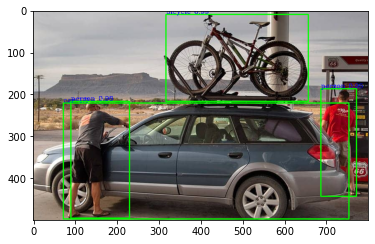

In [10]:
cv2.imshow('prediction ',image)
plt.imshow(image[:,:,::-1])
cv2.waitKey()
cv2.destroyAllWindows()